In [1]:
import pytz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
pi=pd.read_csv('./adamlab-rf.csv',header=0)


In [3]:
pi.head()

,time,ap,inter,util,noise,cl
0,2019-05-30 11:15:00+1000,adam-9800-ap,9.0,4.0,-81.0,98.0
1,2019-05-30 11:15:00+1000,pnp1852,0.0,0.0,-1.0,-1.0
2,2019-05-30 11:15:00+1000,pnp3802,16.0,8.0,-91.0,96.0
3,2019-05-30 11:30:00+1000,pnp1852,0.0,0.0,-1.0,-1.0
4,2019-05-30 11:30:00+1000,adam-9800-ap,14.0,9.0,-84.0,99.0


In [4]:
pi.info

<bound method DataFrame.info of                           time                ap  inter  util  noise    cl
0     2019-05-30 11:15:00+1000      adam-9800-ap    9.0   4.0  -81.0  98.0
1     2019-05-30 11:15:00+1000           pnp1852    0.0   0.0   -1.0  -1.0
2     2019-05-30 11:15:00+1000           pnp3802   16.0   8.0  -91.0  96.0
3     2019-05-30 11:30:00+1000           pnp1852    0.0   0.0   -1.0  -1.0
4     2019-05-30 11:30:00+1000      adam-9800-ap   14.0   9.0  -84.0  99.0
5     2019-05-30 11:30:00+1000           pnp3802   26.0  11.0  -85.0  99.0
6     2019-05-30 11:45:00+1000           pnp1852    0.0   0.0   -1.0  -1.0
7     2019-05-30 11:45:00+1000      adam-9800-ap   12.0   8.0  -84.0  98.0
8     2019-05-30 11:45:00+1000           pnp3802   12.0   5.0  -84.0  99.0
9     2019-05-30 12:00:00+1000      adam-9800-ap   13.0   4.0  -81.0  99.0
10    2019-05-30 12:00:00+1000           pnp1852    0.0   0.0   -1.0  -1.0
11    2019-05-30 12:00:00+1000           pnp3802   18.0  10.0  -87.0

In [5]:
dd = pd.pivot_table(pi, index=["time"], columns=['ap'], values=['noise'], aggfunc=[np.max], fill_value=None,margins=False)

In [6]:
df = pd.DataFrame(dd.to_records())
df.index= pd.to_datetime(df["time"])
del df['time']
new = df.resample('30min').max()

In [7]:
df.head()


,"('amax', 'noise', '3804_sda')","('amax', 'noise', 'APb0aa.776a.1788')","('amax', 'noise', 'adam-9800-ap')","('amax', 'noise', 'adam-ap-office')","('amax', 'noise', 'pnp1852')","('amax', 'noise', 'pnp3802')"
time,,,,,,
2019-05-30 11:15:00+10:00,NaN,NaN,-81.0,NaN,-1.0,-91.0
2019-05-30 11:30:00+10:00,NaN,NaN,-84.0,NaN,-1.0,-85.0
2019-05-30 11:45:00+10:00,NaN,NaN,-84.0,NaN,-1.0,-84.0
2019-05-30 12:00:00+10:00,NaN,NaN,-81.0,NaN,-1.0,-87.0
2019-05-30 12:15:00+10:00,NaN,NaN,-87.0,NaN,-1.0,-80.0


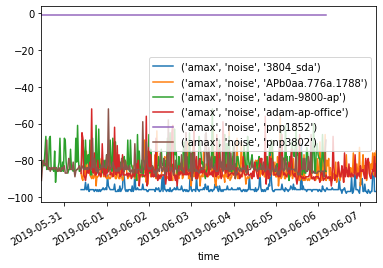

In [8]:
new.plot()
plt.show()

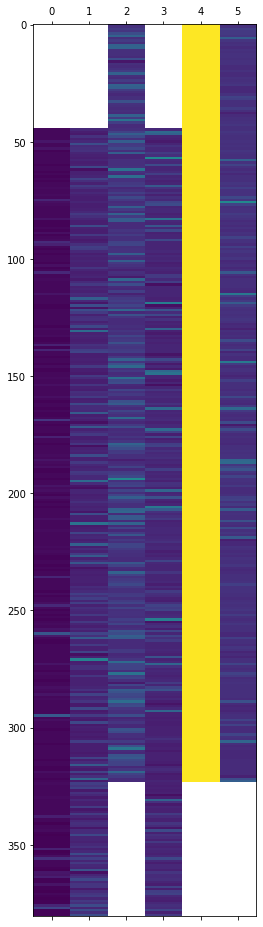

In [9]:
plt.matshow(new, interpolation=None, aspect='auto')

In [10]:
day=new['2019-06-05']

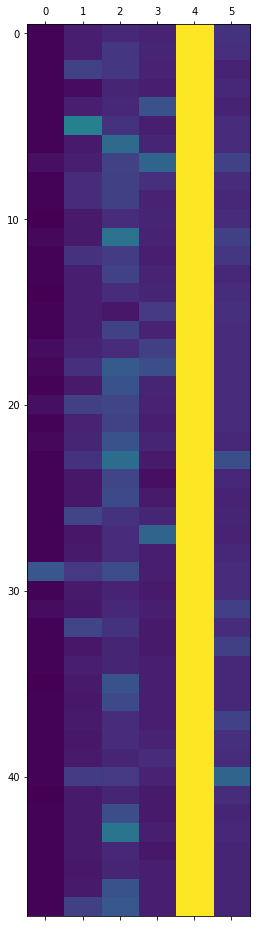

In [11]:
plt.matshow(day, interpolation=None, aspect='auto')

In [12]:
day.shape


(48, 6)

In [13]:
day.head()

,"('amax', 'noise', '3804_sda')","('amax', 'noise', 'APb0aa.776a.1788')","('amax', 'noise', 'adam-9800-ap')","('amax', 'noise', 'adam-ap-office')","('amax', 'noise', 'pnp1852')","('amax', 'noise', 'pnp3802')"
time,,,,,,
2019-06-05 00:00:00+10:00,-96.0,-89.0,-86.0,-88.0,-1.0,-83.0
2019-06-05 00:30:00+10:00,-96.0,-89.0,-82.0,-87.0,-1.0,-84.0
2019-06-05 01:00:00+10:00,-96.0,-78.0,-82.0,-88.0,-1.0,-88.0
2019-06-05 01:30:00+10:00,-96.0,-94.0,-87.0,-89.0,-1.0,-86.0
2019-06-05 02:00:00+10:00,-96.0,-89.0,-86.0,-73.0,-1.0,-88.0


In [16]:
pi=pd.read_csv('./adamlab-rf.csv',header=0)

In [17]:
pi2=pi.loc[pi['noise']<  -1]
#pi2=pi2.loc[pi2['noise'] >   -74]

In [18]:
dd2 = pd.pivot_table(pi2, index=["time"], columns=['ap'], values=['noise'], aggfunc=[np.max], fill_value=None,margins=False)
df2 = pd.DataFrame(dd2.to_records())
df2.index= pd.to_datetime(df2["time"])
del df2['time']

new2 = df2.resample('30min').max()

day2=new2
day2=new2['2019-06-05']

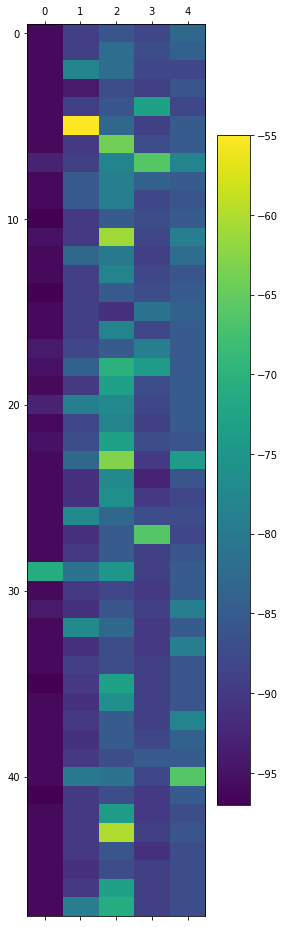

In [19]:
plt.matshow(day2, interpolation=None, aspect='auto')
plt.colorbar()

In [20]:
def fix_labels(cols):
    parts = [col.split("'") for col in cols]
    newcols = [  p[5] if len(p) <9 else '{}\n{}'.format(p[5],p[7])  for p in parts]
    return  newcols

def plot(new):  
    plt.matshow(new, interpolation=None, aspect='auto')
    plt.colorbar()
    
    # get current axis and fix them
    ax = plt.gca()
    
    # x axis across the top
    labels = fix_labels(new.columns)
    ax.set_xticks(np.arange(len(labels)))
    ax.set_xticklabels(labels)
    plt.setp([tick.label2 for tick in ax.xaxis.get_major_ticks()], rotation=90,ha="left", va="center", rotation_mode="anchor")
    
    # now for the time, y axis down the side
    all_time_labels = list(map(lambda x: '{}/{} {}:{:02d}'.format(x.month, x.day, x.hour, x.minute), new.index))
    steps = int(len(new.index) / 48)
    if steps == 0:
        steps = 1
    time_index = list(range(0, len(new.index), steps))
    time_labels = [all_time_labels[i] for i in time_index]
    ax.set_yticks(time_index)
    ax.set_yticklabels(time_labels)
    
    

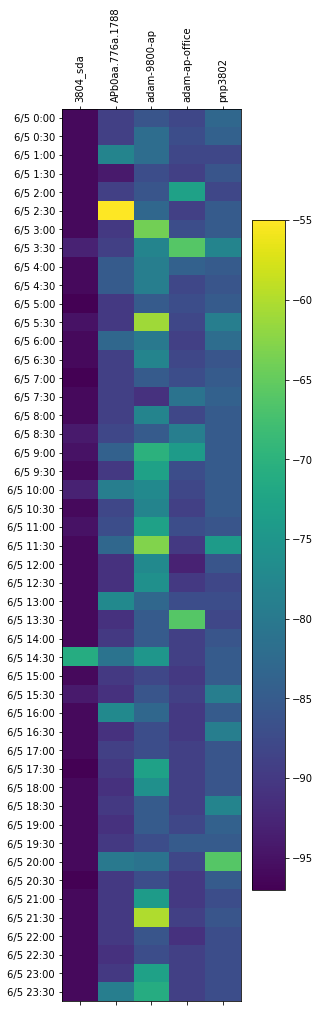

In [21]:
plot(day2)
